# Further develop animal motion model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


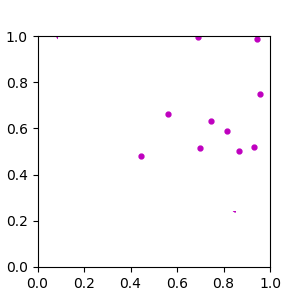

In [2]:
# Homework Attempt

%matplotlib notebook

n = 10
nsteps = 100
x = np.ones(n)*0.5 # Start all the animals in the middle of the square by multiplying by 0.5
y = np.ones(n)*0.5

dt = 0.05

fig = plt.figure(figsize=(3,3));

for i in range(n):
    vx = np.random.rand(n)
    vy = np.random.rand(n)

    for t in range(nsteps):
        x = x + vx*dt
        y = y + vy*dt

        # Create boundaries that animals cannot cross:
        x = np.where(x>0, x, vx)
        x = np.where(x<1, x, vx)
        y = np.where(y>0, y, vy)
        y = np.where(y<1, y, vy)
        #x[x<0] = 0
        #x[x>1] = 0
        #y[y<0] = 0
        #y[y>1] = 0

        # Figure:
        plt.cla()
        plt.plot(x,y, 'm.', markersize=7);
        plt.xlim(0,1);
        plt.ylim(0,1);
        fig.canvas.draw() # Main command to make them move


In the attempt above, I succeeded in implementing a speed value, but I am not sure if it is working correctly. Also, the animals are confined to the box, but they jump around randomly after hitting a wall, and I am not sure how to fix that.

In [3]:
# Test random generators to see how they work:
np.random.uniform(size=10, low=0.5, high=2)

array([0.81017789, 1.00700769, 1.85262918, 1.23069381, 1.11439091,
       1.79722718, 0.82171319, 0.62149434, 1.10755881, 0.61354652])

In [4]:
np.random.randint(size=10, low=0, high=2) # High should be maximum value +1

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

<IPython.core.display.Javascript object>


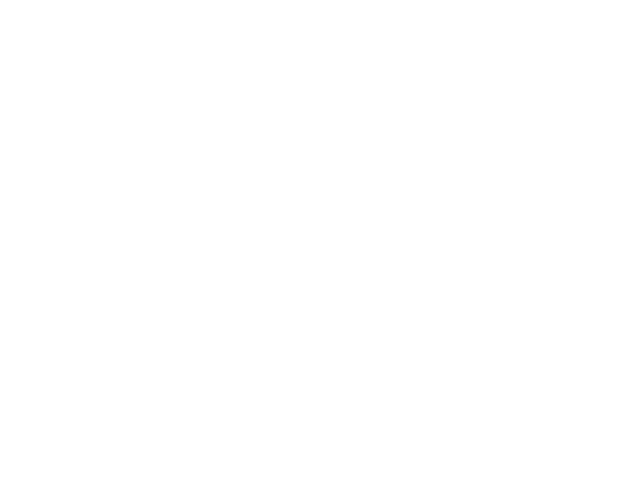

([array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]),


In [5]:
# Test to see if this works:

n = 100
nsteps = 100
vmin = 0.01
vmax = 0.05
vx = np.random.uniform(size=n, low=vmin, high=vmax)*[2*np.random.randint(size=n, low=0, high=2)-1]
plt.figure()
plt.hist(vx, bins=20)

<IPython.core.display.Javascript object>


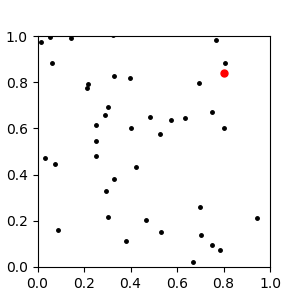

In [28]:
# IN CLASS REVISION

%matplotlib notebook

n = 50
nsteps = 100
vmin = 0.01
vmax = 0.05

x = np.random.uniform(size=n, low=0, high=1) # Make the starting points random
y = np.random.uniform(size=n, low=0, high=1)
vx = np.random.uniform(size=n, low=vmin, high=vmax)*(2*np.random.randint(size=n, low=0, high=2)-1)
vy = np.random.uniform(size=n, low=vmin, high=vmax)*(2*np.random.randint(size=n, low=0, high=2)-1)

fig = plt.figure(figsize=(3,3));

for t in range(nsteps):
    x += vx
    y += vy

    # Create boundaries that reflect animals:
    vx = np.where(np.logical_or(x>1, x<0), -vx, vx)
    vy = np.where(np.logical_or(y>1, y<0), -vy, vy)

    # Figure:
    plt.cla()
    plt.plot(x,y, 'k.', markersize=5);
    plt.plot(x[0],y[0], 'r.', markersize=10) # pick one special elk
    plt.xlim(0,1);
    plt.ylim(0,1);
    fig.canvas.draw() # Main command to make them move
